In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [68]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [69]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

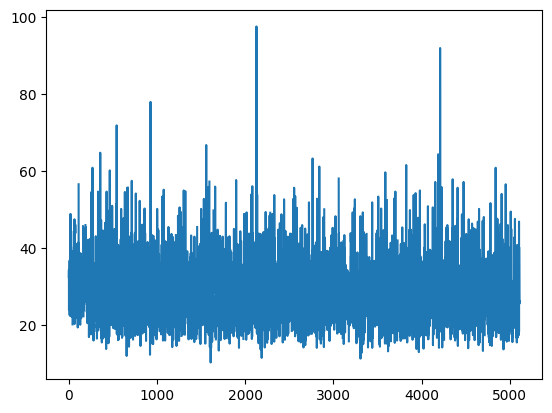

In [70]:
plt.plot(df['bmi'])

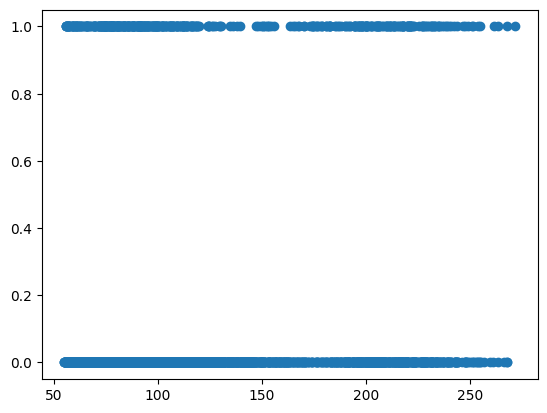

In [71]:
plt.scatter(df['avg_glucose_level'],df['hypertension'])

(array([ 411., 1964., 1809.,  575.,  105.,   37.,    4.,    2.,    0.,
           2.]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 <BarContainer object of 10 artists>)

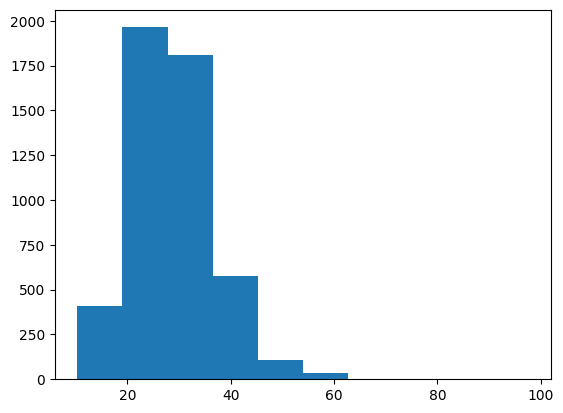

In [72]:
plt.hist(df['bmi'])

In [73]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [74]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['gender'] = lbl.fit_transform(df['gender'])
df['work_type'] = lbl.fit_transform(df['work_type'])
df['smoking_status'] = lbl.fit_transform(df['smoking_status'])

In [75]:
df['gender']

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 5110, dtype: int64

In [76]:
X = df.drop(['stroke','ever_married','Residence_type'],axis =1)
Y = df['stroke']

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .2,random_state = 42)

In [78]:
x_train

,id,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
802,4970,1,79.00,0,0,3,112.64,28.5,1
3927,56137,0,62.00,0,0,2,88.32,36.3,0
2337,54590,0,21.00,0,0,2,59.52,33.7,2
3910,36548,1,31.00,0,0,0,65.70,30.4,1
1886,61171,0,31.00,0,0,2,59.63,19.9,2
...,...,...,...,...,...,...,...,...,...
4426,13846,1,43.00,0,0,0,88.00,30.6,2
466,1307,0,61.00,1,0,2,170.05,60.2,3
3092,31481,0,1.16,0,0,4,97.28,17.8,0
3772,61827,1,80.00,0,0,3,196.08,31.0,1


In [79]:
from sklearn.preprocessing import StandardScaler
xs = StandardScaler()
x_train = xs.fit_transform(x_train)

In [81]:
x_test

,id,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
4688,40041,1,31.00,0,0,3,64.85,23.000000,0
4478,55244,1,40.00,0,0,3,65.29,28.300000,2
3849,70992,0,8.00,0,0,4,74.42,22.500000,0
4355,38207,0,79.00,1,0,3,76.64,19.500000,2
3826,8541,0,75.00,0,0,0,94.77,27.200000,2
...,...,...,...,...,...,...,...,...,...
3605,49553,1,1.88,0,0,4,143.97,28.893237,0
4934,32147,1,1.32,0,0,4,107.02,28.893237,0
4835,63323,1,49.00,1,0,3,119.30,30.400000,1
4105,39236,0,56.00,0,0,3,128.63,24.900000,3


In [82]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf')
clf.fit(x_train,y_train)

SVC()

In [83]:
y_pred = clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [84]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,y_test)
acc

0.9393346379647749